<a href="https://colab.research.google.com/github/brianr-v/Seminario_titulacion/blob/main/Modelo_Canasta_basica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Series temporales para lel análisis y predicción de precios de la canasta básica

El análisis de series temporales es una herramienta que sirve para modelar y predecir fenómenos que varían con el tiempo. En el contexto de la canasta básica y su impacto en el consumo familiar, estas técnicas permiten identificar patrones históricos, tendencias de largo plazo y fluctuaciones estacionales en los precios de los productos esenciales, así como sus efectos en el poder adquisitivo de las familias mexicanas.

##Definición y utilidad de las series temporales
Una serie temporal es una secuencia de datos recolectados en intervalos regulares de tiempo, como días, meses o años. Este tipo de análisis se utiliza para estudiar cómo un fenómeno evoluciona, identificar ciclos y tendencias, y realizar predicciones sobre su comportamiento futuro. En el caso de los precios de la canasta básica, estas herramientas permiten:

* **Identificar tendencias a largo plazo**, como el aumento sostenido en los costos de ciertos productos.
* **Detectar estacionalidad**, es decir, fluctuaciones periódicas que ocurren en determinados momentos del año debido a factores como la oferta agrícola o las festividades.
* **Analizar impactos externos**, como los efectos de políticas económicas, cambios en la inflación o crisis globales.

##Componentes de un modelo de series temporales
Para desarrollar un modelo efectivo, es necesario descomponer la serie temporal en sus componentes principales:

1. Tendencia (Trend): Representa el comportamiento a largo plazo de los precios.
2. Estacionalidad (Seasonality): Variaciones periódicas dentro de un año.
3. Ciclo (Cycle): Fluctuaciones que ocurren en periodos más largos, relacionadas con eventos económicos.
4. Ruido (Noise): Variaciones aleatorias que no tienen un patrón definido.

##Datos requeridos para el análisis
El modelo de series temporales requiere datos históricos de los precios de los productos de la canasta básica, idealmente desglosados por categorías (alimentos, higiene, etc.) y recolectados en intervalos regulares, en este caso son datos semanales extraidos de la pagina de PROFECO: https://www.profeco.gob.mx/precios/canasta/qqpc.php

##Técnicas de modelado para series temporales
Entre las metodologías más utilizadas para analizar series temporales, destacan:

Promedios móviles y suavización exponencial: Utilizadas para eliminar el ruido de los datos y observar la tendencia subyacente.
Modelos ARIMA (Autoregressive Integrated Moving Average): Herramientas avanzadas para capturar las tendencias, estacionalidad y dependencias temporales.
Modelos SARIMA (Seasonal ARIMA): Extensión de ARIMA que incorpora factores estacionales.
Modelos basados en machine learning: Algoritmos como redes neuronales recurrentes (RNN) y Prophet, diseñados para capturar patrones complejos en datos históricos.

#Simulación

##Instalación de librerías necesarias

In [1]:
pip install pandas numpy matplotlib statsmodels


##Importar librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


##Cargar datos

Tenemos un archivo xlsx llamado Modelo_Canasta_Basica.xlsx con las columnas *Fecha* y *Precio*:

In [4]:
# Cargar los datos
data = pd.read_excel('/Modelo_Canasta_Basica.xlsx')
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index('Fecha', inplace=True)
#print(data)


FileNotFoundError: [Errno 2] No such file or directory: '/Modelo_Canasta_Basica.xlsx'

##Visualización inicial

Graficamos los datos para observar tendencias y patrones:

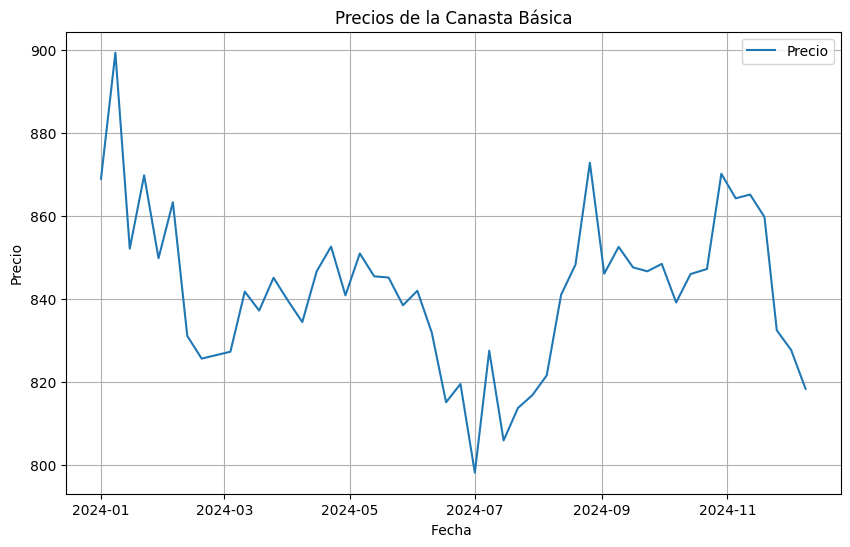

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Precio'], label='Precio')
plt.title('Precios de la Canasta Básica')
plt.xlabel('Fecha ')
plt.ylabel('Precio')
plt.legend()
plt.grid()
plt.show()


##Prueba de estacionariedad

Realizamos la prueba de Dickey-Fuller aumentada para verificar si los datos son estacionarios:

In [ ]:
result = adfuller(data['Precio'])
print(f'Estadístico ADF: {result[0]}')
print(f'P-valor: {result[1]}')

Estadístico ADF: -2.990432291343567
P-valor: 0.035797616031502076


**Si el p-valor > 0.05**, los datos no son estacionarios y deberás diferenciar la serie:

In [ ]:
data['Precio_diff'] = data['Precio'].diff().dropna()

##Determinar parámetros SARIMA (p, d, q) y estacionales (P, D, Q, s)

Usamos ACF y PACF para estimar parámetros iniciales:

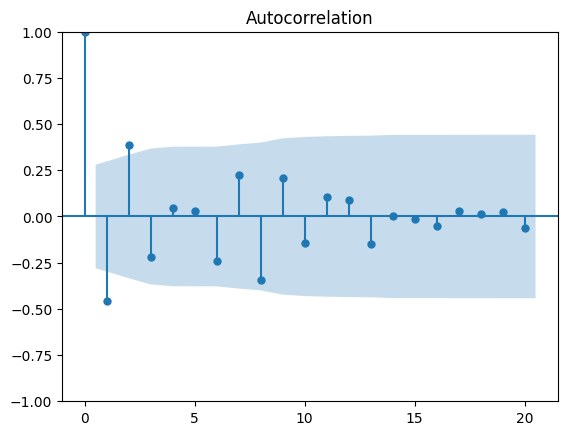

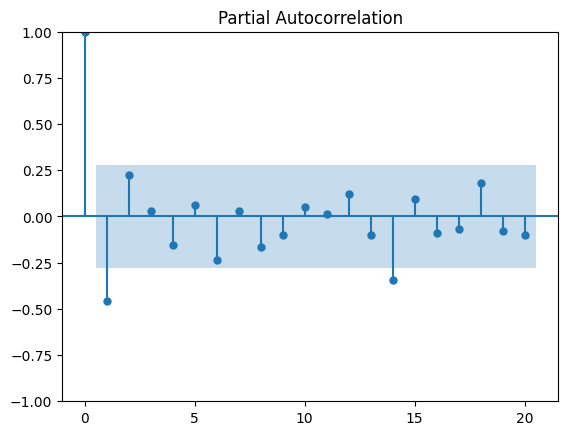

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['Precio_diff'].dropna(), lags=20)
plt.show()

plot_pacf(data['Precio_diff'].dropna(), lags=20)
plt.show()


Selecciona los valores de p y q observando los cortes significativos en las gráficas de ACF y PACF.

##Ajustar el modelo SARIMA

Usaremos SARIMA con valores iniciales basados en los gráficos. Supongamos que los valores son:

(p, d, q) = (1, 1, 1)
(P, D, Q, s) = (1, 1, 1, 12)

In [ ]:
model = SARIMAX(data['Precio'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


##Evaluar el modelo

Verificamos los residuales del modelo:

In [ ]:
model = SARIMAX(data['Precio'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 6), # Reduced seasonal lag to 6
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


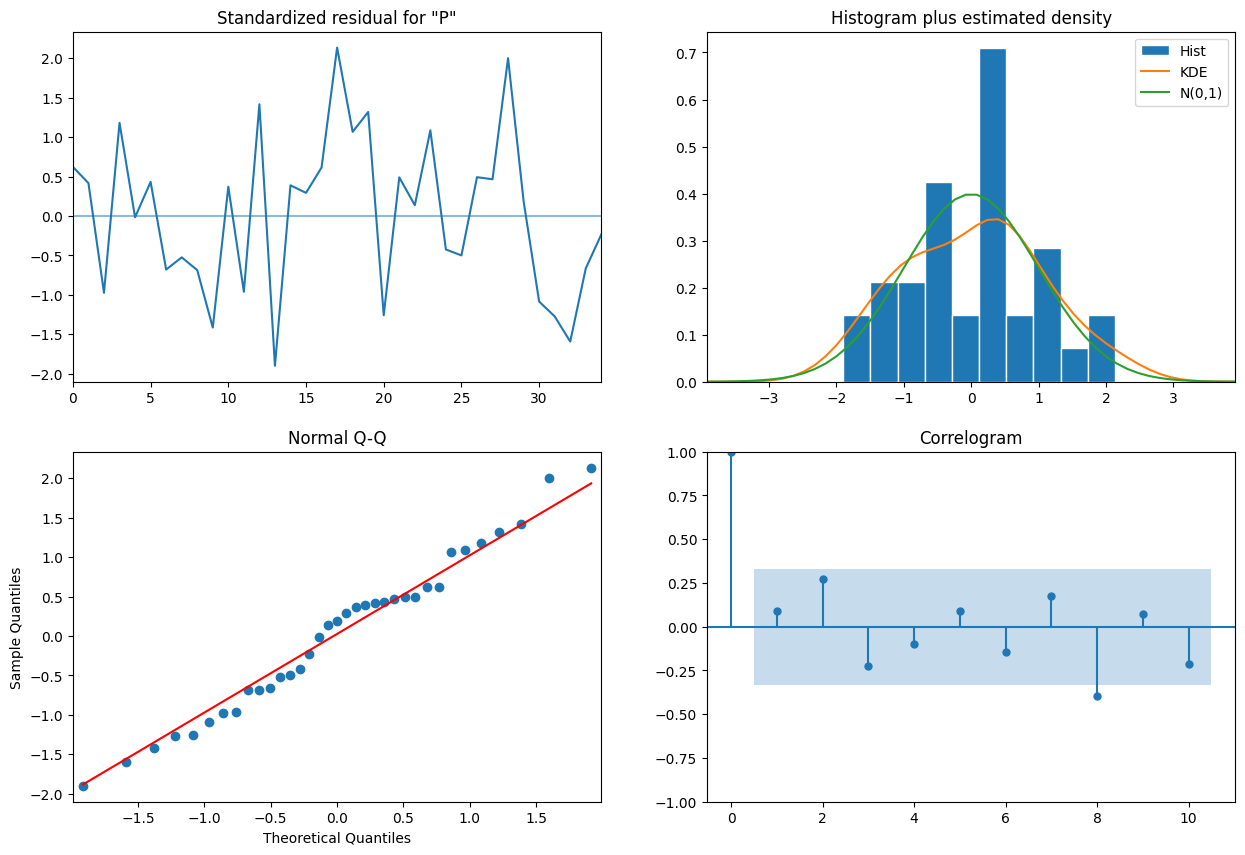

In [ ]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()


##Realizar predicciones

Predicciones para los próximos 12 meses:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-35-c66ecb8ff7b1>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1], periods=12, freq='M')


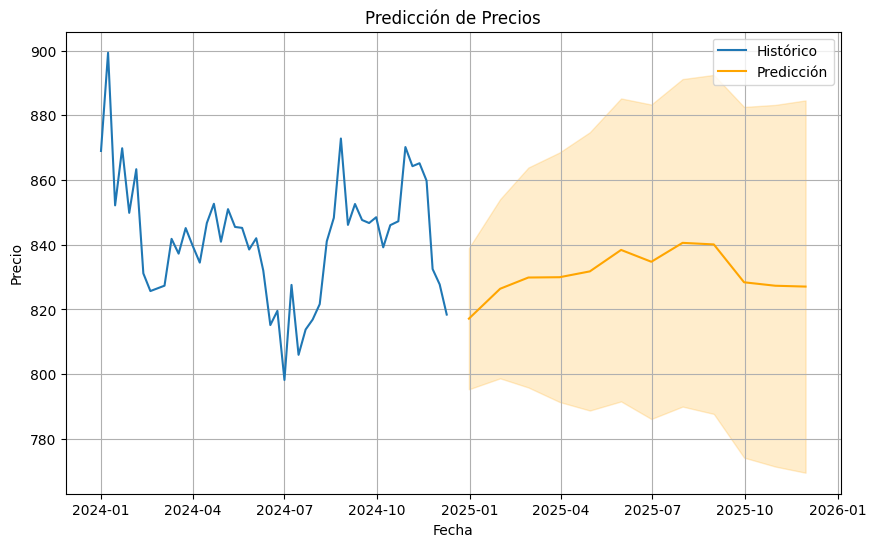

In [ ]:
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(data.index[-1], periods=12, freq='M')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(data['Precio'], label='Histórico')
plt.plot(forecast_index, forecast_mean, label='Predicción', color='orange')
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2)
plt.title('Predicción de Precios')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

y_real = data['Precio'][-12:]  # Valores reales (últimos 12 puntos del histórico)
y_pred = forecast_mean  # Valores predichos

mae = mean_absolute_error(y_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_real, y_pred))
mape = mean_absolute_percentage_error(y_real, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")


##Interpretación
Observa la predicción y determina:

¿El precio continuará aumentando?
¿Hay ciclos estacionales marcados?
¿Cómo podría esto impactar en el consumo familiar?